In [ ]:
!pip install rouge-score

In [ ]:
import pandas as pd
import os
import numpy as np
from rouge_score import rouge_scorer
from google.colab import drive
from tqdm import tqdm
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
os.chdir('/content/drive/My Drive/riset NLP/Covid 19 Backup')
!ls -a

'base model.ipynb'		 Model_Backup
 base_model_transformer.csv	 modelling.ipynb
'base model transformer.ipynb'	'news cleaned.csv'
 base_model_transformer.json	 news.csv
'content summaries.png'		' preprocessing.ipynb'
'content word.png'		 ProcessedData.json
'content word predicted.png'	 pub_data_test_1.csv
'Copy of scoring.ipynb'		 pub_data_test_2.csv
 data_res_test_1.csv		 pub_data_test_3.csv
 data_res_test_2.csv		 pub_data_test_4.csv
 data_res_test_3.csv		 pub_data_test_5.csv
 data_res_test_4.csv		 pub_graphic_1.json
 data_res_test_4.xlsx		 pub_graphic_2.json
'dist content'			 pub_graphic_3.json
'dist content(1).png'		 pub_graphic_4.json
'dist content.png'		 pub_graphic_5.json
'dist summary'			'result score.png'
'dist summary(1).png'		 score_rouge_model_4.csv
'dist summary.png'		 scoring.ipynb
 glove.840B.300d.txt		 splitting.png
 glove.840B.300d.zip		'train loss.png'
 .ipynb_checkpoints		'train val loss.png'
 Keras_CoVe.h5			'Transformer Origin'


In [ ]:
import json
with open ('pub_graphic_1.json') as fp:
    graph_model1 = json.load(fp)
with open ('pub_graphic_2.json') as fp:
    graph_model2 = json.load(fp)
with open ('pub_graphic_3.json') as fp:
    graph_model3 = json.load(fp)
with open ('pub_graphic_5.json') as fp:
    graph_model4 = json.load(fp)

In [ ]:
score_model_1 = pd.read_csv('pub_data_test_1.csv')
score_model_2 = pd.read_csv('pub_data_test_2.csv')
score_model_3 = pd.read_csv('pub_data_test_3.csv')
score_model_4 = pd.read_csv('pub_data_test_5.csv')

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2'])

In [ ]:
list_model = [score_model_1,score_model_2,score_model_3,score_model_4]

In [ ]:
rouge1_all_model = []
rouge2_all_model = []

for score_model in list_model:
  rouge1 = []
  rouge2 = []
  for row in tqdm(score_model.iterrows()):
    scores = scorer.score(
      row[1].actual,
      row[1].predicted
      )
    rouge1_s = scores['rouge1']
    rouge1.append(rouge1_s.fmeasure)
    rouge2_s = scores['rouge2']
    rouge2.append(rouge2_s.fmeasure)
  rouge1_all_model.append(np.average(rouge1))
  rouge2_all_model.append(np.average(rouge2))

552it [00:00, 2362.43it/s]
552it [00:00, 2435.77it/s]
552it [00:00, 2259.75it/s]
552it [00:00, 2397.37it/s]


In [ ]:
model = ['model1','model2','model3','model4']
score_df = pd.DataFrame({"model":model,"rouge1":rouge1_all_model,"rouge2":rouge2_all_model})
score_melt = score_df.melt('model', var_name='rouge', value_name='score')

# Plotting Model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


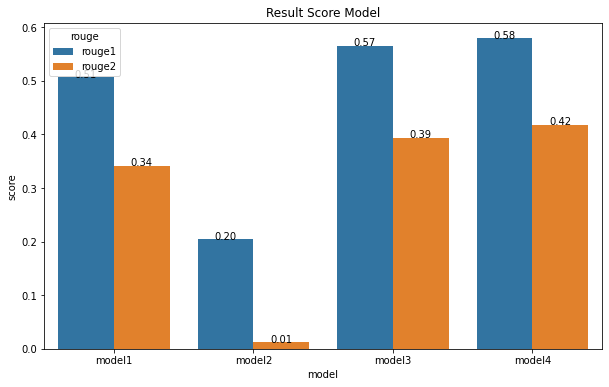

In [ ]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='model', y='score', hue="rouge", data=score_melt)
show_values_on_bars(ax)
plt.title("Result Score Model")
plt.show()

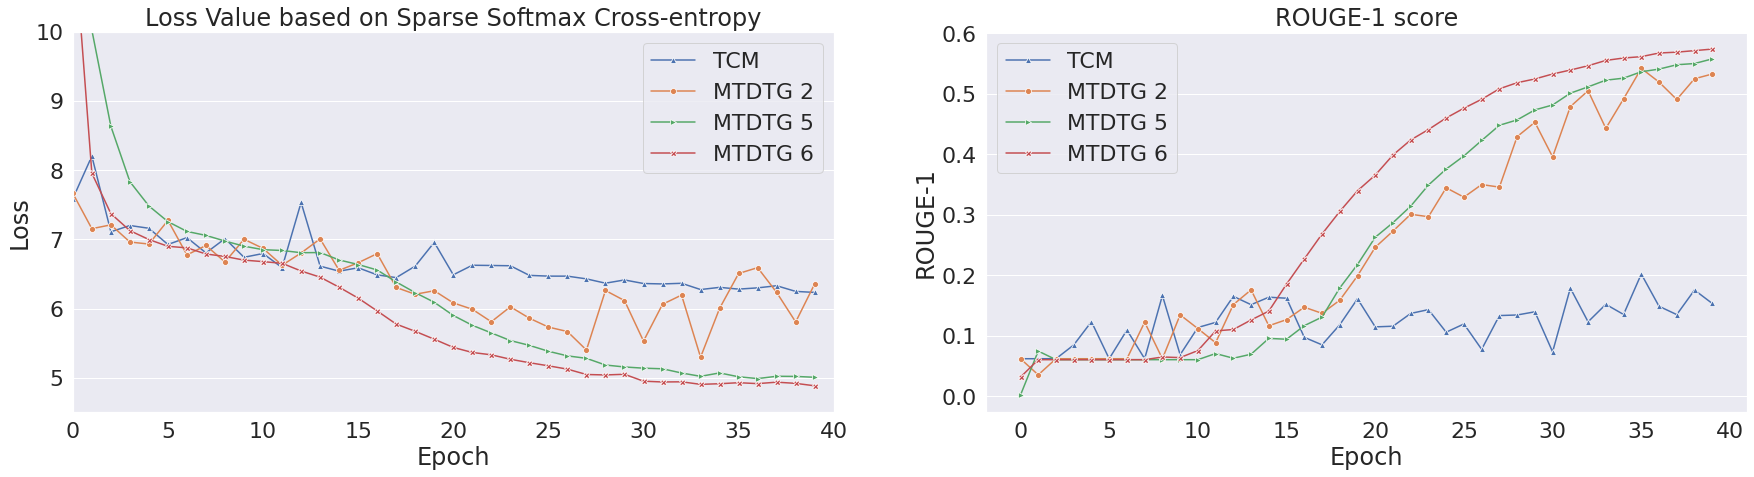

In [ ]:
plt.figure(figsize=(30,7))
ax = plt.subplot(1,2,1)
sns.set(font_scale=2)
sns.lineplot(range(0, len(graph_model2['loss_eval'])), graph_model2['loss_eval'], linestyle='-', marker='^', label="TCM")
sns.lineplot(range(0, len(graph_model1['loss_eval'])), graph_model1['loss_eval'], linestyle='-', marker='o', label="MTDTG 2")
sns.lineplot(range(0, len(graph_model3['loss_eval'][:40])), graph_model3['loss_eval'][:40], linestyle='-', marker='>', label="MTDTG 5")
sns.lineplot(range(0, len(graph_model4['loss_eval'][:40])), graph_model4['loss_eval'][:40], linestyle='-', marker='X', label="MTDTG 6")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Value based on Sparse Softmax Cross-entropy')
plt.ylim(4.5,10)
plt.xlim(0,40)
ax.xaxis.grid()
ax = plt.subplot(1,2,2)
sns.set(font_scale=2)
sns.lineplot(range(0, len(graph_model2['rouge_score'])), graph_model2['rouge_score'], linestyle='-', marker='^', label="TCM")
sns.lineplot(range(0, len(graph_model1['rouge_score'])), graph_model1['rouge_score'], linestyle='-', marker='o', label="MTDTG 2")
sns.lineplot(range(0, len(graph_model3['rouge_score'][:40])), graph_model3['rouge_score'][:40], linestyle='-', marker='>', label="MTDTG 5")
sns.lineplot(range(0, len(graph_model4['rouge_score'][:40])), graph_model4['rouge_score'][:40], linestyle='-', marker='X', label="MTDTG 6")
plt.xlabel('Epoch')
plt.title('ROUGE-1 score')
plt.ylabel('ROUGE-1')
ax.xaxis.grid()
plt.show()

In [ ]:
print("max TCM: ",max(graph_model2['rouge_score']))
print("max MTDTG 2: ",max(graph_model1['rouge_score']))
print("max MTDTG 5: ",max(graph_model3['rouge_score']))
print("max MTDTG 6: ",max(graph_model4['rouge_score']))

max TCM:  0.20186818660875372
max MTDTG 2:  0.5417847006083976
max MTDTG 5:  0.5957579934588758
max MTDTG 6:  0.6053015266965782


# Best Model Plot

552it [00:00, 2385.61it/s]


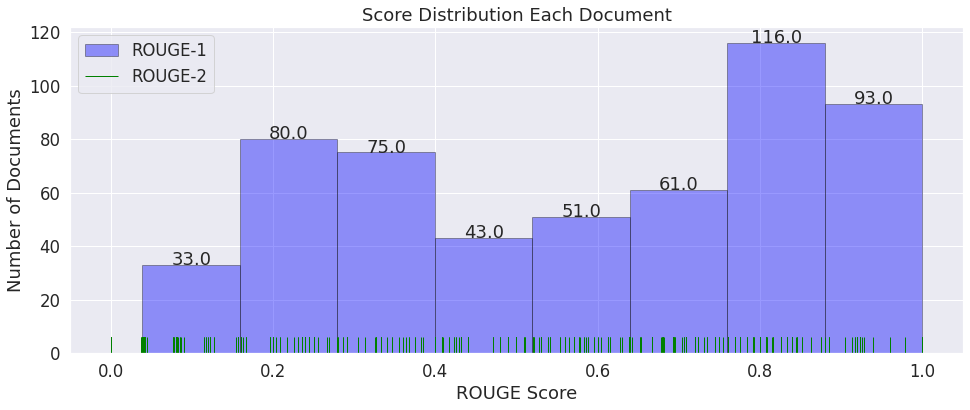

In [ ]:
import seaborn as sns
rouge1 = []
rouge2 = []
for row in tqdm(score_model_4.iterrows()):
  scores = scorer.score(
    row[1].actual,
    row[1].predicted
    )
  rouge1_s = scores['rouge1']
  rouge1.append(rouge1_s.fmeasure)
  rouge2_s = scores['rouge2']
  rouge2.append(rouge2_s.fmeasure)

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

plt.figure(figsize=(16,6))
plt.rcParams["patch.force_edgecolor"] = True
sns.set(font_scale=1.5)
sns.distplot(rouge2, kde=False, rug=True, hist=False, color="green", label="ROUGE-2")
ax = sns.distplot(rouge1, kde=False, color="blue", label="ROUGE-1", hist_kws=dict(edgecolor="k", linewidth=1))
show_values_on_bars(ax)
plt.xlabel("ROUGE Score")
plt.ylabel("Number of Documents")
plt.title("Score Distribution Each Document")
plt.legend()
plt.show()

In [ ]:
score_model_4['rouge1'] = pd.Series(rouge1, index=score_model_4.index)
score_model_4['rouge2'] = pd.Series(rouge2, index=score_model_4.index)
score_model_4

,actual,predicted,rouge1,rouge2
0,a global recession would likely kill more peop...,for people who have lost loved the <UNK> pande...,0.160000,0.000000
1,four candidates will be on the ballot for the ...,though two candidates have called for the camp...,0.346154,0.040000
2,youngsters partying it up on beaches . familie...,the moments of seen footage of young people pa...,0.440000,0.250000
3,health officials in alberta are taking further...,health officials in alberta are taking further...,0.867925,0.745098
4,people who sat near this passenger on three di...,a <UNK> case of <UNK> has been reported by pub...,0.039216,0.000000
...,...,...,...,...
547,pembina pipeline corp. is cutting its capital ...,pembina pipeline corp. is cutting its capital ...,0.925926,0.846154
548,ottawa technology company <UNK> a second emplo...,technology company said a second employee in o...,0.440000,0.250000
549,`` we are all collectively trying to flatten t...,the city of winnipeg 's interim multi-year bud...,0.259259,0.038462
550,edmonton news at 6 host nancy carlson sits dow...,calgary news at 7 host nancy carlson <UNK> and...,0.533333,0.325581


In [ ]:
score_model_4.to_csv("score_rouge_model_4.csv")

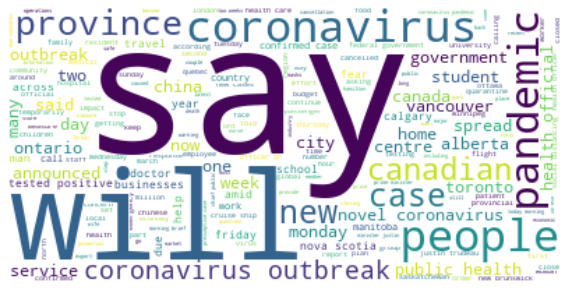

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def replace_all(text, tokenlist):
    for token in tokenlist:
        text = text.replace(token, "")
    return text

cloud_predicted_summaries = (" ").join([word for text in score_model_4.iterrows() for word in text[1]])
cloud_predicted_summaries = replace_all(cloud_predicted_summaries, ["<UNK>","<GO>","<PRED>","<EOS>","<PAD>"])
plt.figure(figsize=(10,8))
wordcloud = WordCloud(background_color="white").generate(cloud_predicted_summaries)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("content word predicted.png", format="png")
plt.show()

In [ ]:
# sorted(wordcloud.words_)
most_word = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)
few_word = sorted(wordcloud.words_.items(), key=lambda x: x[1])

In [ ]:
i = 1
split = 5
percentage = 0
for key, value in most_word[0:25]:
  print(key, end=", ")
  percentage += value
  if(i%5==0):
    print(percentage/5)
    print("\n")
    percentage = 0
  i += 1

say, will, coronavirus, people, pandemic, 0.8306569343065693


province, new, case, canadian, coronavirus outbreak, 0.5678832116788322


public health, government, city, canada, said, 0.4554744525547445


day, monday, spread, novel coronavirus, two, 0.3839416058394161


outbreak, china, announced, home, now, 0.34306569343065696




In [ ]:
i = 1
split = 5
percentage = 0
for key, value in few_word[0:25]:
  print(key, end=", ")
  percentage += value
  if(i%5==0):
    print(percentage/5)
    print("\n")
    percentage = 0
  i += 1

disease, families, masks, major, caused, 0.08467153284671533


death, threat, operations, warning, place, 0.08759124087591241


price, potential, store, nurse, park, 0.08759124087591241


provincial health, care workers, self isolation, slow spread, stock market, 0.08759124087591241


first nation, grocery store, expert, public, including, 0.09197080291970802




In [ ]:
len(few_word)

200

In [ ]:
actual_compare = """
about 30 nurses in edmonton have refused to swab patients for the coronavirus because their alberta health services wont provide n95 masks , their union says <EOS>
"""
model1_compare = "b.c. now are in edmonton have had to test patients for the coronavirus, the health services said the province will be for the of the <EOS>"
model2_compare = "about are in edmonton province had to test patients for the coronavirus, health services said the provide are will be for the of the <EOS>"
model3_compare = "the province nurses in edmonton have refused to the patients for the coronavirus because alberta health services( ahs) will not provide are masks, <EOS>"
model4_compare = "roughly 30 nurses in edmonton have refused to swab for for the coronavirus because alberta health services( sgi) will not provide care masks, <EOS>"

In [ ]:
scorer.score(actual_compare, model4_compare)

{'rouge1': Score(precision=0.75, recall=0.6923076923076923, fmeasure=0.7199999999999999),
 'rouge2': Score(precision=0.5217391304347826, recall=0.48, fmeasure=0.4999999999999999)}